In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# OBSERVATION DATA
forcens = pd.read_csv("~/Science/lgm_foram_census/tidy/forcens_sp_r_wsst.csv")
lgm = pd.read_csv("~/Science/lgm_foram_census/tidy/lgm_sp_r_wsst.csv")

## read in data
topt = pd.read_csv("../data/Topt_sp_lgm.csv")

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarn

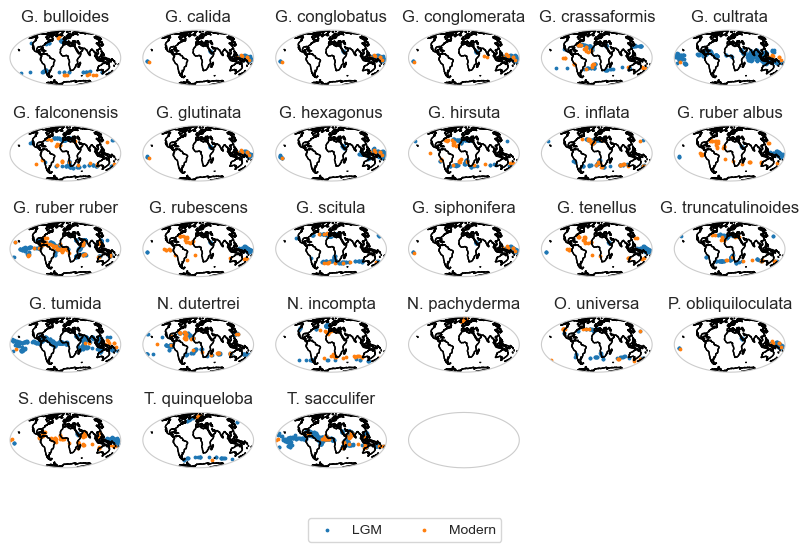

In [5]:
## write a function to filter species
def sp_opt_sub(df, age, species):
    ## select latitudes, longitudes and species columns
    df_sub = df[['Latitude','Longitude',species, "SST"]]
    ## get optimal temperature
    opt_temp = topt[topt["species"] == species][age].to_numpy()[0]
    ## 1. high abundance
    #q = np.nanpercentile(df_sub[species], 50)
    #df_sub = df_sub[df_sub[species] >= 0.5]
    ## 2. optimal temperature
    df_sub = df_sub[abs(df_sub["SST"] - opt_temp) <= 0.5]

    return df_sub

## write a function to plot optimal niche, just occurence
def plot_opt_niche(ax, df, age, species):
    ## select latitudes, longitudes and species columns
    df_sub = sp_opt_sub(df, age,  species)
    ## plot
    ax.scatter(df_sub.Longitude, df_sub.Latitude, s=3, transform=ccrs.PlateCarree())

    ## add coastlines
    ax.coastlines()
    ax.set_global()

    ## set title
    ax.set_title(species)

    return ax

## do this for multiple species
fig, axes = plt.subplots(nrows=5, ncols=6,
                         figsize=(10, 6),
                         subplot_kw=dict(projection=ccrs.Mollweide()))

species_list = topt.species

for i, ax in enumerate(axes.flat):
    plot_opt_niche(ax, forcens, "PI", species_list[i])
    plot_opt_niche(ax, lgm, "LGM",species_list[i])
    ## if exceed the number of species, break
    if i == len(species_list) - 1:
        break

fig.delaxes(axes[4][4])
fig.delaxes(axes[4][5])

## add legend
fig.legend(["LGM", "Modern"], loc="lower center", ncol=2)

## save the fig
fig.savefig("../output/opt_niche_change.png", dpi=300, bbox_inches='tight')